# Regression - SVM  
\#Regression \#Wine \#SVM 

Here one can find implementation of some regression models (only SVM for now) trying to solve wine classification problem

## Importing libraries

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, svm, metrics
from imblearn.metrics import geometric_mean_score
from math import sqrt

## Loading data

In [254]:
dataset = pd.read_csv("winequality-white.csv")

In [255]:
subset = np.random.choice(dataset.shape[0], size=15)
dataset.iloc[subset]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2352,6.1,0.280,0.16,1.3,0.060,36.0,126.0,0.99353,3.13,0.46,8.7,6
1890,7.7,0.300,0.42,14.3,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,5
4515,7.1,0.280,0.26,2.8,0.039,50.0,118.0,0.99080,3.06,0.59,11.2,6
3729,7.5,0.280,0.41,1.3,0.044,11.0,126.0,0.99293,3.28,0.45,10.3,5
2465,7.5,0.280,0.78,12.1,0.041,53.0,161.0,0.99838,2.98,0.44,8.7,5
652,7.1,0.260,0.34,14.4,0.067,35.0,189.0,0.99860,3.07,0.53,9.1,7
1303,8.2,0.200,0.36,8.1,0.035,60.0,163.0,0.99520,3.05,0.30,10.3,6
1969,6.3,0.410,0.30,3.2,0.030,49.0,164.0,0.99270,3.53,0.79,11.7,7
4115,7.3,0.260,0.32,1.2,0.041,29.0,94.0,0.98978,3.07,0.45,12.0,6
750,7.2,0.290,0.40,7.6,0.024,56.0,177.0,0.99280,3.04,0.32,11.5,6


## Preprocessing

### Missing values

In [256]:
print("Missing values? ", dataset.isnull().values.any())

Missing values?  False


### Attributes and class distribution

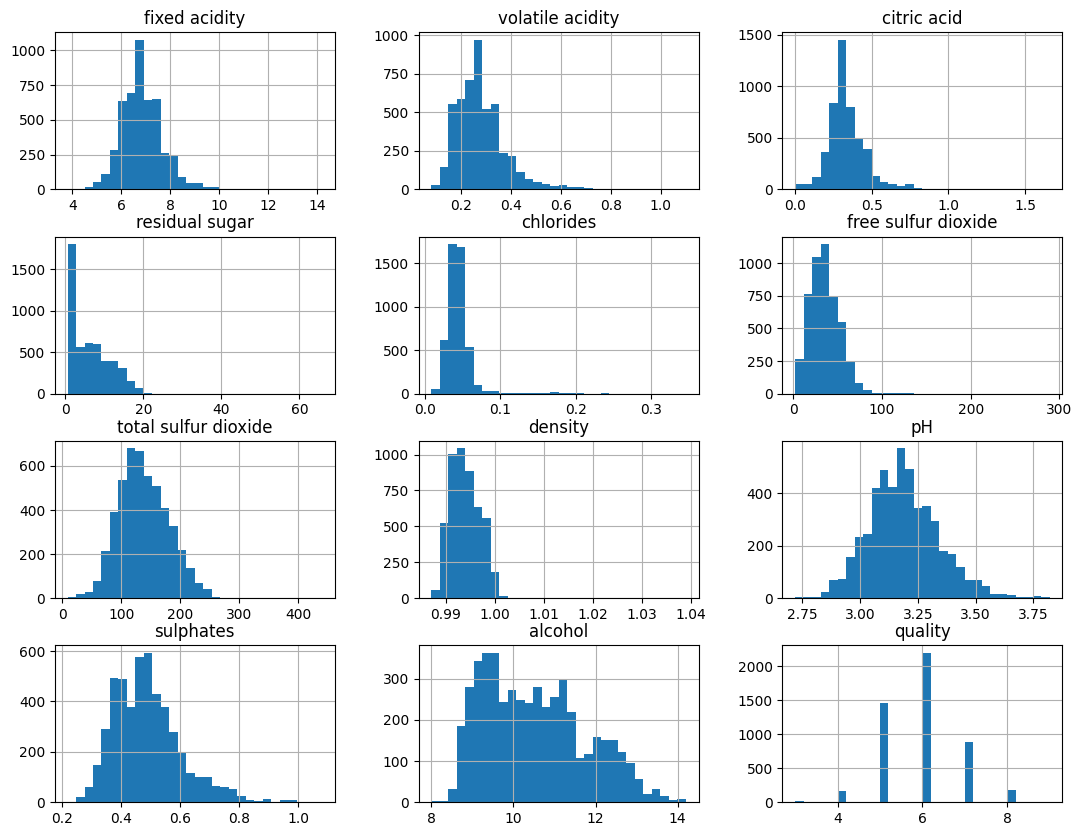

In [257]:
dataset.hist(bins=30,figsize=(13,10))
plt.show()

I am aware of imbalanced data, but I will proceed regardless for now. Although I will delete the most sparse class.

### Deleting sparse class

In [258]:
dataset = dataset[dataset.quality != 9]
# dataset = dataset[dataset.quality != 3]
# dataset = dataset[dataset.quality != 4]
# dataset = dataset[dataset.quality != 8]
print(dataset.quality.value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
Name: quality, dtype: int64


## Regression models

### Reference model that predicts always 6

In [259]:
rmse_list = []
r2_list = []
accuracy_list = []
grouped_acc_list = []
gmean_list = []
f1_list = []


for _ in range(50):
    (train_x, test_x, train_y, test_y) = model_selection.train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], train_size=0.8)

    predictions = [6] * test_y.size

    rmse_list.append(sqrt(metrics.mean_squared_error(test_y, predictions)))
    r2_list.append(metrics.r2_score(test_y, predictions))
    accuracy_list.append(metrics.accuracy_score(test_y, predictions))
    matrix = metrics.confusion_matrix(test_y, predictions)
    grouped_acc_list.append(matrix.diagonal()/matrix.sum(axis=1))
    gmean_list.append(geometric_mean_score(test_y, predictions))
    f1_list.append(metrics.f1_score(test_y, predictions, average='weighted'))

print("Regression")
print(f"RMSE: {np.average(rmse_list)}")
print(f"R-squared: {np.average(r2_list)}")
print()
print(f"Classification")
print(f"F1: {np.average(f1_list)}")  
print(f"G-mean: {np.average(gmean_list)}")
print(f"Accuracy: {np.average(accuracy_list)}")
print(f"Grouped accuracy: {np.mean(grouped_acc_list, axis=0)}")

Regression
RMSE: 0.8909505212195037
R-squared: -0.021644872863947767

Classification
F1: 0.2792349017667826
G-mean: 0.0
Accuracy: 0.44982635342185906
Grouped accuracy: [0. 0. 0. 1. 0. 0.]


### SVM

In [260]:
rmse_list = []
r2_list = []
accuracy_list = []
grouped_acc_list = []
gmean_list = []
f1_list = []

for _ in range(10):
    (train_x, test_x, train_y, test_y) = model_selection.train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], train_size=0.8)
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    regr = svm.SVR()
    regr.fit(train_x, train_y)
    predictions = regr.predict(test_x)

    rmse_list.append(sqrt(metrics.mean_squared_error(test_y, predictions)))
    r2_list.append(metrics.r2_score(test_y, predictions))
    for i, prediction in enumerate(predictions):
        predictions[i] = round(prediction)
    accuracy_list.append(metrics.accuracy_score(test_y, predictions))
    matrix = metrics.confusion_matrix(test_y, predictions)
    grouped_acc_list.append(matrix.diagonal()/matrix.sum(axis=1))
    gmean_list.append(geometric_mean_score(test_y, predictions))
    f1_list.append(metrics.f1_score(test_y, predictions, average='weighted'))

print("Regression")
print(f"RMSE: {np.average(rmse_list)}")
print(f"R-squared: {np.average(r2_list)}")
print()
print(f"Classification")
print(f"F1: {np.average(f1_list)}")   
print(f"G-mean: {np.average(gmean_list)}")
print(f"Accuracy: {np.average(accuracy_list)}")
print(f"Grouped accuracy: {np.mean(grouped_acc_list, axis=0)}")

Regression
RMSE: 0.7058066632257975
R-squared: 0.371311487904871

Classification
F1: 0.5268683858622616
G-mean: 0.0
Accuracy: 0.5576098059244127
Grouped accuracy: [0.         0.02077822 0.57437181 0.73567064 0.32488984 0.0055303 ]


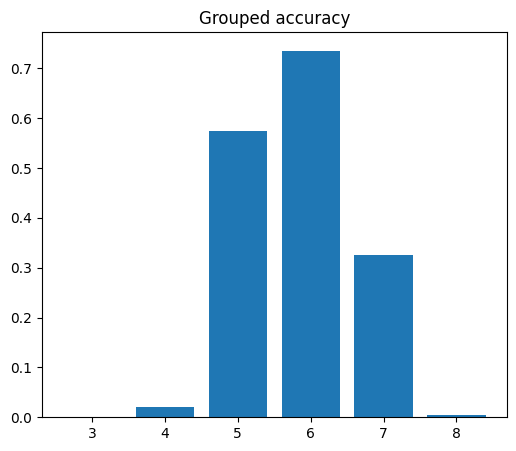

In [261]:
plt.figure(figsize=(6, 5))
plt.bar(["3", "4", "5", "6", "7", "8"], np.mean(grouped_acc_list, axis=0))
plt.title('Grouped accuracy')
plt.show()